항성 대기 과제 

planck 분포 그리기

별주위에 disk가 있는 경우 적외선 초과

In [1]:
# import modules.
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [2]:
# Define constants.
h=6.6260755*(1e-27)    #Planck constant(erg s)
c=2.99793458*(1e18)    #Speed of light(A/s)
k=1.380658*(1e-16)     #Boltzmaann constant(erg/K)
e=np.e                 #Euler's constant
R0=6.95508*(10**(18))  #Solar radius(A)
TS=10000        #Temperature of star(T)

In [3]:
Rs=10*R0        #star radius
SS=np.pi*Rs**2  #square measure of star
R1=100*R0/2      #Inner radius
R2=10000*R0/2    #Outer radius
S=np.pi*((R2**2)-(R1**2)) #square measure of disk

In [4]:
T=[250, 500, 1000]        #Temperature of each case

In [5]:
def B_lamda(lamda,T,square_measure):   #Define function (planck distribution)*(square measure of disk)
    B=(2*h*(c**2))*(lamda**-5)/(e**((h*c)/(lamda*k*T))-1)*(square_measure)
    return B

In [6]:
lamda=np.linspace(10e1,10e6, 100000)     #Define range of lamda.

# Define list that be append result of function.
y=[]
y1=[]
y2=[]
y3=[]
x=[]

# make results whith while.
z=0
while z<len(lamda):
    a=log(B_lamda(lamda[z],TS,SS))
    a1=log(B_lamda(lamda[z],TS,SS)+B_lamda(lamda[z],T[0],S))
    a2=log(B_lamda(lamda[z],TS,SS)+B_lamda(lamda[z],T[1],S))
    a3=log(B_lamda(lamda[z],TS,SS)+B_lamda(lamda[z],T[2],S))
    
    x.append(log(lamda[z]*1e-8)) # make lamda to log scale.
    y.append(a)
    y1.append(a1)
    y2.append(a2)
    y3.append(a3)
    z+=1

<ipython-input-5-5c2d1cbaf59e>:2: RuntimeWarning: overflow encountered in double_scalars
  B=(2*h*(c**2))*(lamda**-5)/(e**((h*c)/(lamda*k*T))-1)*(square_measure)


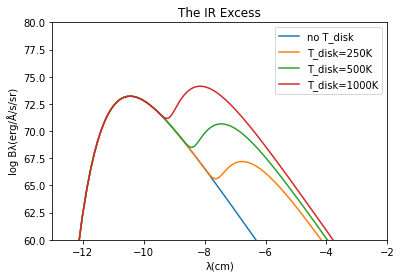

In [7]:
# plot results.
plt.axis([-13,-2, 60,80])
plt.title('The IR Excess')
plt.xlabel('λ(cm)')
plt.ylabel('log Bλ(erg/Å/s/sr)')
plt.plot(x,y,label="no T_disk")
plt.plot(x,y1,label="T_disk=250K")
plt.plot(x,y2,label="T_disk=500K")
plt.plot(x,y3,label="T_disk=1000K")
plt.legend(loc='best')